## Basic data structures in pandas

1) series:  a 1-D labeled array holding data of any type

2) DataFrame: a 2-D data structure that holds data like a two-dimension array or a table with rows and columns.

Fundamentally, data alignment is intrinsic. The link between labels and data will not be brokken unless done so explicitly by you.

In [2]:
import numpy as np
import pandas as pd

## Series
It is a 1-D labeled array capable of holding any data type. The axis labels are collectively referred to as the INDEX. 
The basic method to create a seires is to call:

s = pd.Series(data, index=index)

In [3]:
s = pd.Series(np.random.randn(5), index=["a","b","c","d","e"])
s

a   -0.724029
b   -0.100432
c    1.492483
d   -0.516404
e   -1.488591
dtype: float64

In [4]:
s.index

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

In [5]:
pd.Series(np.random.randn(5))

0   -1.252210
1    0.016021
2   -1.042012
3    0.007696
4    2.499647
dtype: float64

#### From dict

In [6]:
d = {"b":1, "a":0, "c":2}
pd.Series(d)

b    1
a    0
c    2
dtype: int64

In [9]:
pd.Series(d, index=["b","c","d","a"])
# NaN (not a number) is the standard missing data marker used in pandas.

b    1.0
c    2.0
d    NaN
a    0.0
dtype: float64

#### From scalar value
If "data" is a scalar value, an index must be provided. The value will be repeated to match the length of Index.

In [10]:
pd.Series(5.0, index=["a","b","c","d","e"])

a    5.0
b    5.0
c    5.0
d    5.0
e    5.0
dtype: float64

#### Series is ndarray-like
Series acts very similarly to a ndarray and is a valid argument to most NumPy functions. However, operations such as slicing will also slice the index

In [11]:
s.iloc[0]

-0.724029191094619

In [12]:
s.iloc[:3]

a   -0.724029
b   -0.100432
c    1.492483
dtype: float64

In [13]:
s[s > s.median()]

b   -0.100432
c    1.492483
dtype: float64

In [14]:
np.exp(s)

a    0.484795
b    0.904446
c    4.448126
d    0.596662
e    0.225690
dtype: float64

ExtensionArray is a thin wrapper around one or more concrete arrays like a numpy.ndarray. pandas knows how to take an ExtensionArray and store it in a Series or a column of a DataFrame.

In [16]:
s.array

<PandasArray>
[  -0.724029191094619, -0.10043224338408258,   1.4924829609613528,
   -0.516403713900107,  -1.4885908228115756]
Length: 5, dtype: float64

Even if the "Series" is backed by a "ExtensionArray", "Series.to_numpy()" will return a Numpy ndarray

In [18]:
pd.Series.to_numpy(s)

array([-0.72402919, -0.10043224,  1.49248296, -0.51640371, -1.48859082])

#### Series is dict-like
A "series" is also like a fixed-size dict in that you can get and set values by index label:

In [19]:
s["a"]

-0.724029191094619

In [20]:
s["e"]

-1.4885908228115756

In [21]:
"e" in s

True

In [23]:
s["f"] # exception is raised.

KeyError: 'f'

Using the "Series.get()" method, a missing label will return None or specified defalut:

In [24]:
s.get("f")

In [25]:
s.get("f", np.nan)

nan

## Vectorized operations and label alihnment with Series
When working with raw NumPy arrays, looping through value-by-value is usually not necessary. The same is true when working with "Series" in pandas.

In [26]:
s + s

a   -1.448058
b   -0.200864
c    2.984966
d   -1.032807
e   -2.977182
dtype: float64

In [27]:
s * 2

a   -1.448058
b   -0.200864
c    2.984966
d   -1.032807
e   -2.977182
dtype: float64

A key difference between "Sereis" and ndarray is that operations between "Series" automatically align the data based on label. Thus, you can write computations without giving consideration to whether the "Series" involved have the same labels.

In [28]:
s + s

a   -1.448058
b   -0.200864
c    2.984966
d   -1.032807
e   -2.977182
dtype: float64

In [30]:
s.iloc[1:] + s.iloc[:-1]
# The result of an operation between unaligned Series will have the union of the # indexes involved. If a label is not found in one Series or the other, the result # will be marked as missing NaN.

a         NaN
b   -0.200864
c    2.984966
d   -1.032807
e         NaN
dtype: float64

#### Name attribute

In [31]:
s = pd.Series(np.random.randn(5), name="physics")
s

0   -1.698383
1   -0.109823
2   -0.148843
3    0.349051
4   -0.094739
Name: physics, dtype: float64

In [32]:
s.name

'physics'

You can rename a Series with the pandas.Series.rename() method.

In [34]:
s2 = s.rename("maths")
s2.name
# "s" and "s2" refer to different objects

'maths'

## DataFrame
DataFrame is a 2-D labeled data structure with columns of potentially different types. Along with the data, you can optionally pass index (row labels) and columns (cliumn labels) arguments.If you pass an index and/or columns, you are guaranteeing the index and/or columns of the resulting DataFrame. Thus, a dict of Series plus a specific index will discard all data not matching up to the passed index

If axis labels are not passed, they will be constructed from the input data based on common sense rules.

#### From dict of Series or dicts
The resulting index will be the union of the indexes of the various Series. If there are any nasted dicts, these will first be converted to series. If no columns are passed, the columns will be ordered list of dict keys

In [39]:
d = {
    "one": pd.Series([1,2,3], index=["a","b","c"]),
    "two": pd.Series([1,2,3,4], index=["a","b","c","d"])
}

df = pd.DataFrame(d)
df

,one,two
a,1.0,1
b,2.0,2
c,3.0,3
d,NaN,4


In [40]:
pd.DataFrame(d, index=["d","b","a"])

,one,two
d,NaN,4
b,2.0,2
a,1.0,1


In [41]:
pd.DataFrame(d, index=["d","b","a"], columns=["two","three"])

,two,three
d,4,NaN
b,2,NaN
a,1,NaN


In [42]:
df.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [43]:
df.columns

Index(['one', 'two'], dtype='object')

#### From dict of ndarrays/lists
All ndarrays must share the same length. If an index is passed, it must also be the same length as the arrays. If no index is passed, the result will be "range(n)", where "n" is the array length.

In [45]:
d = {
    "one": [1.0,2.0,3.0,4.0],
    "two": [4.0,3.0,2.0,1.0]
}

pd.DataFrame(d)

,one,two
0,1.0,4.0
1,2.0,3.0
2,3.0,2.0
3,4.0,1.0


In [46]:
pd.DataFrame(d, index=["a","b","c","d"])

,one,two
a,1.0,4.0
b,2.0,3.0
c,3.0,2.0
d,4.0,1.0


#### From structured or record array

In [49]:
data = np.zeros((2,), dtype=[("A","i4"), ("B","f4"), ("c","a10")])
data[:] = [(1,2.0,"Hello"), (2,3.0,"World")]
data

array([(1, 2., b'Hello'), (2, 3., b'World')],
      dtype=[('A', '<i4'), ('B', '<f4'), ('c', 'S10')])

In [50]:
pd.DataFrame(data)

,A,B,c
0,1,2.0,b'Hello'
1,2,3.0,b'World'


#### From a list of dicts

In [51]:
data2 = [{"a":1, "b":2}, {"a":5, "b":10, "c":20}]
pd.DataFrame(data2)

,a,b,c
0,1,2,NaN
1,5,10,20.0


In [52]:
pd.DataFrame(data2, index = ["first","second"])

,a,b,c
first,1,2,NaN
second,5,10,20.0


In [53]:
pd.DataFrame(data2, columns = ["a","b"])

,a,b
0,1,2
1,5,10


#### From a dict of tuples
You can automatically create a MultiIndexed frame by passing a tuples dictionary.

The outer index represents the column MultiIndex levels. In this case, we have two levels: ('a', 'b'), ('a', 'a'), ('a', 'c'), ('b', 'a'), and ('b', 'b').

The inner index represents the row MultiIndex levels. In this case, we have ('A', 'B'), ('A', 'C'), and ('A', 'D').

The values represent the data points at the intersections of the column and row MultiIndex levels.
Now, let's construct the DataFrame:

For column ('a', 'b'), the value at row ('A', 'B') is 1, and at row ('A', 'C') is 2.

For column ('a', 'a'), the value at row ('A', 'C') is 3, and at row ('A', 'B') is 4.

For column ('a', 'c'), the value at row ('A', 'B') is 5, and at row ('A', 'C') is 6.

For column ('b', 'a'), the value at row ('A', 'C') is 7, and at row ('A', 'B') is 8.

For column ('b', 'b'), the value at row ('A', 'D') is 9, and at row ('A', 'B') is 10.

In [55]:
pd.DataFrame(
    {
        ("a","b"): {("A","B"):1, ("A","C"): 2},
        ("a","a"): {("A","C"):3, ("A","B"): 4},
        ("a","c"): {("A","B"):5, ("A","C"): 6},
        ("b","a"): {("A","C"):7, ("A","B"): 8},
        ("b","b"): {("A","D"):9, ("A","B"): 10}
    }
)

a              b      
       b    a    c    a     b
A B  1.0  4.0  5.0  8.0  10.0
  C  2.0  3.0  6.0  7.0   NaN
  D  NaN  NaN  NaN  NaN   9.0

In [56]:
pd.DataFrame(
    {
        ("a","b"): {("A","B"):1, ("A","C"): 2},
        ("b","a"): {("A","C"):3, ("A","B"): 4},
        ("e","c"): {("A","B"):5, ("A","C"): 6},
        ("c","a"): {("A","C"):7, ("A","B"): 8},
        ("d","b"): {("A","D"):9, ("A","B"): 10}
    }
)

a    b    e    c     d
       b    a    c    a     b
A B  1.0  4.0  5.0  8.0  10.0
  C  2.0  3.0  6.0  7.0   NaN
  D  NaN  NaN  NaN  NaN   9.0

In [59]:
pd.DataFrame(
    {
        ("a","b"): {("A","B"):1, ("A","C"): 2},
        ("a","a"): {("B","C"):3, ("B","B"): 4},
        ("a","c"): {("A","B"):5, ("A","C"): 6},
        ("b","a"): {("B","C"):7, ("B","B"): 8},
        ("b","b"): {("C","D"):9, ("A","B"): 10}
    }
)

a              b      
       b    a    c    a     b
A B  1.0  NaN  5.0  NaN  10.0
  C  2.0  NaN  6.0  NaN   NaN
B C  NaN  3.0  NaN  7.0   NaN
  B  NaN  4.0  NaN  8.0   NaN
C D  NaN  NaN  NaN  NaN   9.0

In [60]:
pd.DataFrame(
    {
        ("a","b"): {("A","B"):1, ("A","C"): 2},
        ("b","a"): {("B","C"):3, ("B","B"): 4},
        ("e","c"): {("A","B"):5, ("A","C"): 6},
        ("c","a"): {("B","C"):7, ("B","B"): 8},
        ("d","b"): {("C","D"):9, ("A","B"): 10}
    }
)

a    b    e    c     d
       b    a    c    a     b
A B  1.0  NaN  5.0  NaN  10.0
  C  2.0  NaN  6.0  NaN   NaN
B C  NaN  3.0  NaN  7.0   NaN
  B  NaN  4.0  NaN  8.0   NaN
C D  NaN  NaN  NaN  NaN   9.0

#### From a Series
The result will be a DataFrame with the same index as the input Series, and with one column whose name is the original name of the Series (only is no other column name provided).

In [61]:
ser = pd.Series(range(3), index=list("abc"), name="ser")
pd.DataFrame(ser)

,ser
a,0
b,1
c,2


## Column selection, addition, deletion
You can treat a "DataFrame" semantically like a dict like-indexed "Series" objects. Getting, setting, and deleting columns works with the same syntax as the analogous dict operations:

In [69]:
df["one"]

a    1.0
b    2.0
c    3.0
d    NaN
Name: one, dtype: float64

In [71]:
df["three"] = df["one"] * df["two"]
df["flag"] = df["one"] > 2
df

KeyError: 'two'

Columns can be deleted or popped like with a dict:

In [68]:
del df["two"]

KeyError: 'two'

In [74]:
three = df.pop("three")
three

KeyError: 'three'

In [75]:
df

,one,flag
a,1.0,False
b,2.0,False
c,3.0,True
d,NaN,False


When inserting a scalar value, it will naturally be propagated to fill the column:

In [76]:
df["foo"] = "bar"
df

,one,flag,foo
a,1.0,False,bar
b,2.0,False,bar
c,3.0,True,bar
d,NaN,False,bar


When inserting a "Series" that does not have the same index as the "DataFrame", it will be conformed to the DataFrame's index:

In [77]:
df["one_trunc"] = df["one"][:2]
df

,one,flag,foo,one_trunc
a,1.0,False,bar,1.0
b,2.0,False,bar,2.0
c,3.0,True,bar,NaN
d,NaN,False,bar,NaN


You can insert raw ndarrays but their length must match the length of the DataFrame's index.

By deafult columns get inserted at the end. "DataFrame.insert()" inserts at a particular location in the columns:

In [78]:
df.insert(1, "bar", df["one"])
df

,one,bar,flag,foo,one_trunc
a,1.0,1.0,False,bar,1.0
b,2.0,2.0,False,bar,2.0
c,3.0,3.0,True,bar,NaN
d,NaN,NaN,False,bar,NaN


#### Assigning new columns in method chains
DataFrame has an "assign()" method that allows you to easily create new columns that are protentially derived from existing columns

In [80]:
iris = pd.read_csv("Superstore_orders.csv")

In [81]:
iris.head()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,...,postal_code,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit
0,1,CA-2020-152156,11/8/20,11/11/20,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2020-152156,11/8/20,11/11/20,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2020-138688,6/12/20,6/16/20,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2019-108966,10/11/19,10/18/19,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2019-108966,10/11/19,10/18/19,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [86]:
iris.assign(t_profit = iris["sales"] - iris["discount"])

# assign() always returns a copy of the data, leaving the original DataFrame untouched.

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,...,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit,t_profit
0,1,CA-2020-152156,11/8/20,11/11/20,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,261.9600
1,2,CA-2020-152156,11/8/20,11/11/20,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,731.9400
2,3,CA-2020-138688,6/12/20,6/16/20,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,14.6200
3,4,US-2019-108966,10/11/19,10/18/19,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,957.1275
4,5,US-2019-108966,10/11/19,10/18/19,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,22.1680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2018-110422,1/21/18,1/23/18,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028,25.0480
9990,9991,CA-2021-121258,2/26/21,3/3/21,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332,91.9600
9991,9992,CA-2021-121258,2/26/21,3/3/21,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932,258.3760
9992,9993,CA-2021-121258,2/26/21,3/3/21,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200,29.6000


In [87]:
dfa = pd.DataFrame({"A": [1, 2, 3], "B": [4, 5, 6]})

dfa.assign(C=lambda x: x["A"] + x["B"], D=lambda x: x["A"] + x["C"])

,A,B,C,D
0,1,4,5,6
1,2,5,7,9
2,3,6,9,12


## Indexing  / selection

Operation(-----------------------------------)Syntax(----------)Result

Select column(-------------------------------)df[col] (---------)Series

Select row by label(-------------------------)df.loc[label] (---)Series

Select row by integer location(--------------)df.iloc[loc] (----)Series

Slice rows(----------------------------------)df[5:10] (--------)DataFrame

Select rows by boolean vector(---------------)df[bool_vec] (----)DataFrame

Row selection, for example, returns a Series whose index is the columns of the DataFrame:



In [89]:
df

,one,bar,flag,foo,one_trunc
a,1.0,1.0,False,bar,1.0
b,2.0,2.0,False,bar,2.0
c,3.0,3.0,True,bar,NaN
d,NaN,NaN,False,bar,NaN


In [92]:
df.loc["b"]  # getting all the values of row "b" in Series

one            2.0
bar            2.0
flag         False
foo            bar
one_trunc      2.0
Name: b, dtype: object

In [93]:
df.iloc[2] # same as above

one           3.0
bar           3.0
flag         True
foo           bar
one_trunc     NaN
Name: c, dtype: object

#### Different choices for indexing
1) ".loc" is primarily label based, but may also be used with a boolean array. ".loc" will raise "keyerror" when the items are not found. 

2) ".iloc" is primariy onteger position based (from 0 to length-1 of the axis), but may also be used with boolean array. "iloc" will raise "IndexError" if a requested indexer is out-of-bounds, except "slice" indexers which allow out-of-bounds indexing. 

#### Basic
The primary function of indexing with "[]" is selecting lower-dimensional slices which means "series[label]" will return scalar value and "dataframe[colname]" will return series corresponding to colname

In [97]:
dates = pd.date_range('1/1/2000', periods=8)
dates

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08'],
              dtype='datetime64[ns]', freq='D')

In [99]:
df = pd.DataFrame(np.random.randn(8,4), index=dates, columns=["A","B","C","D"])
df

,A,B,C,D
2000-01-01,-0.213898,0.073353,-0.434363,-1.505676
2000-01-02,0.115425,1.397579,-0.113597,-0.948744
2000-01-03,-0.771522,0.520835,0.231231,-1.116658
2000-01-04,0.828357,0.490405,-0.985632,-0.930663
2000-01-05,-1.109583,0.813132,-0.713278,-0.004915
2000-01-06,-1.586902,1.674815,1.528006,-0.880541
2000-01-07,-0.844709,0.189086,-0.073110,0.076707
2000-01-08,-0.689554,-1.115610,-0.375858,0.747198


In [100]:
df['A']

2000-01-01   -0.213898
2000-01-02    0.115425
2000-01-03   -0.771522
2000-01-04    0.828357
2000-01-05   -1.109583
2000-01-06   -1.586902
2000-01-07   -0.844709
2000-01-08   -0.689554
Freq: D, Name: A, dtype: float64

In [103]:
df

,A,B,C,D
2000-01-01,-0.213898,0.073353,-0.434363,-1.505676
2000-01-02,0.115425,1.397579,-0.113597,-0.948744
2000-01-03,-0.771522,0.520835,0.231231,-1.116658
2000-01-04,0.828357,0.490405,-0.985632,-0.930663
2000-01-05,-1.109583,0.813132,-0.713278,-0.004915
2000-01-06,-1.586902,1.674815,1.528006,-0.880541
2000-01-07,-0.844709,0.189086,-0.073110,0.076707
2000-01-08,-0.689554,-1.115610,-0.375858,0.747198


In [104]:
df[['B','A']] = df[['A','B']]
df

,A,B,C,D
2000-01-01,0.073353,-0.213898,-0.434363,-1.505676
2000-01-02,1.397579,0.115425,-0.113597,-0.948744
2000-01-03,0.520835,-0.771522,0.231231,-1.116658
2000-01-04,0.490405,0.828357,-0.985632,-0.930663
2000-01-05,0.813132,-1.109583,-0.713278,-0.004915
2000-01-06,1.674815,-1.586902,1.528006,-0.880541
2000-01-07,0.189086,-0.844709,-0.073110,0.076707
2000-01-08,-1.115610,-0.689554,-0.375858,0.747198


##### **IMP**
pandas aligns all AXES when setting "Series" and "DataFrame" from ".loc". This will not modify "df" because the column alignment is before value assignment

In [106]:
df[['A','B']]

,A,B
2000-01-01,-0.213898,0.073353
2000-01-02,0.115425,1.397579
2000-01-03,-0.771522,0.520835
2000-01-04,0.828357,0.490405
2000-01-05,-1.109583,0.813132
2000-01-06,-1.586902,1.674815
2000-01-07,-0.844709,0.189086
2000-01-08,-0.689554,-1.115610


In [108]:
df.loc[:,['B','A']] = df[['A','B']]
df[['A','B']]

# Values of 'A' and 'B' didnot change even after replacing with each others values. So what if I want to change the values of columns in original df?

,A,B
2000-01-01,-0.213898,0.073353
2000-01-02,0.115425,1.397579
2000-01-03,-0.771522,0.520835
2000-01-04,0.828357,0.490405
2000-01-05,-1.109583,0.813132
2000-01-06,-1.586902,1.674815
2000-01-07,-0.844709,0.189086
2000-01-08,-0.689554,-1.115610


The correct way to swap column values is by using raw values:

In [113]:
df.loc[:,['B','A']] = df[['A','B']].to_numpy()
df  # values in now changed. You can run it twice to see if values are changing or not

,A,B,C,D
2000-01-01,0.073353,-0.213898,-0.434363,-1.505676
2000-01-02,1.397579,0.115425,-0.113597,-0.948744
2000-01-03,0.520835,-0.771522,0.231231,-1.116658
2000-01-04,0.490405,0.828357,-0.985632,-0.930663
2000-01-05,0.813132,-1.109583,-0.713278,-0.004915
2000-01-06,1.674815,-1.586902,1.528006,-0.880541
2000-01-07,0.189086,-0.844709,-0.073110,0.076707
2000-01-08,-1.115610,-0.689554,-0.375858,0.747198


**IMP**

However, pandas does not align AXES when setting "Series" and "DataFrame" from ".iloc" because it operates by position.

This will modify "df" because column alignment is not done before value assignement

In [114]:
df[['A','B']]

,A,B
2000-01-01,0.073353,-0.213898
2000-01-02,1.397579,0.115425
2000-01-03,0.520835,-0.771522
2000-01-04,0.490405,0.828357
2000-01-05,0.813132,-1.109583
2000-01-06,1.674815,-1.586902
2000-01-07,0.189086,-0.844709
2000-01-08,-1.115610,-0.689554


In [115]:
df.iloc[:,[1,0]] = df[['A','B']]
df[['A','B']]

,A,B
2000-01-01,-0.213898,0.073353
2000-01-02,0.115425,1.397579
2000-01-03,-0.771522,0.520835
2000-01-04,0.828357,0.490405
2000-01-05,-1.109583,0.813132
2000-01-06,-1.586902,1.674815
2000-01-07,-0.844709,0.189086
2000-01-08,-0.689554,-1.115610


**So bascially when you use ".loc" to change values of columns, it will not make any changes in the original dataframe because column alignment is before value assignment. However, if you use ".iloc" to change or replace the values then it will modify dataframe because column alignment is not done before value assignment**

#### Attribute access
You may access an index on a "Series" or column on a "DataFrame" directly as an attribute

In [116]:
sa = pd.Series([1,2,3], index= list('abc'))
dfa = df.copy()

In [117]:
sa.b

2

In [118]:
dfa.A

2000-01-01   -0.213898
2000-01-02    0.115425
2000-01-03   -0.771522
2000-01-04    0.828357
2000-01-05   -1.109583
2000-01-06   -1.586902
2000-01-07   -0.844709
2000-01-08   -0.689554
Freq: D, Name: A, dtype: float64

In [119]:
sa.a = 5
sa

a    5
b    2
c    3
dtype: int64

In [120]:
dfa

,A,B,C,D
2000-01-01,-0.213898,0.073353,-0.434363,-1.505676
2000-01-02,0.115425,1.397579,-0.113597,-0.948744
2000-01-03,-0.771522,0.520835,0.231231,-1.116658
2000-01-04,0.828357,0.490405,-0.985632,-0.930663
2000-01-05,-1.109583,0.813132,-0.713278,-0.004915
2000-01-06,-1.586902,1.674815,1.528006,-0.880541
2000-01-07,-0.844709,0.189086,-0.073110,0.076707
2000-01-08,-0.689554,-1.115610,-0.375858,0.747198


In [122]:
dfa.A = list(range(len(dfa.index)))
dfa

,A,B,C,D
2000-01-01,0,0.073353,-0.434363,-1.505676
2000-01-02,1,1.397579,-0.113597,-0.948744
2000-01-03,2,0.520835,0.231231,-1.116658
2000-01-04,3,0.490405,-0.985632,-0.930663
2000-01-05,4,0.813132,-0.713278,-0.004915
2000-01-06,5,1.674815,1.528006,-0.880541
2000-01-07,6,0.189086,-0.073110,0.076707
2000-01-08,7,-1.115610,-0.375858,0.747198


You can also assign a "dict" to a row of a "DataFrame"

In [123]:
x = pd.DataFrame({'x':[1,2,3], 'y':[3,4,5]})
x.iloc[1] = {'x':9,'y':99}
x

,x,y
0,1,3
1,9,99
2,3,5


## Slicing ranges

In [124]:
s[:5]

0   -1.698383
1   -0.109823
2   -0.148843
3    0.349051
4   -0.094739
Name: physics, dtype: float64

In [125]:
s[::2]

0   -1.698383
2   -0.148843
4   -0.094739
Name: physics, dtype: float64

In [126]:
s[::-1]

4   -0.094739
3    0.349051
2   -0.148843
1   -0.109823
0   -1.698383
Name: physics, dtype: float64

In [127]:
s2 = s.copy()
s2

0   -1.698383
1   -0.109823
2   -0.148843
3    0.349051
4   -0.094739
Name: physics, dtype: float64

In [128]:
s2[:5] = 0
s2

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: physics, dtype: float64

With DataFrame, slicing inside of "[]" slices the rows. This is provided largely as a convenience since it is such a common operation

In [130]:
df

,A,B,C,D
2000-01-01,-0.213898,0.073353,-0.434363,-1.505676
2000-01-02,0.115425,1.397579,-0.113597,-0.948744
2000-01-03,-0.771522,0.520835,0.231231,-1.116658
2000-01-04,0.828357,0.490405,-0.985632,-0.930663
2000-01-05,-1.109583,0.813132,-0.713278,-0.004915
2000-01-06,-1.586902,1.674815,1.528006,-0.880541
2000-01-07,-0.844709,0.189086,-0.073110,0.076707
2000-01-08,-0.689554,-1.115610,-0.375858,0.747198


In [129]:
df[:3]

,A,B,C,D
2000-01-01,-0.213898,0.073353,-0.434363,-1.505676
2000-01-02,0.115425,1.397579,-0.113597,-0.948744
2000-01-03,-0.771522,0.520835,0.231231,-1.116658


In [132]:
df[::-1] # reverse

,A,B,C,D
2000-01-08,-0.689554,-1.115610,-0.375858,0.747198
2000-01-07,-0.844709,0.189086,-0.073110,0.076707
2000-01-06,-1.586902,1.674815,1.528006,-0.880541
2000-01-05,-1.109583,0.813132,-0.713278,-0.004915
2000-01-04,0.828357,0.490405,-0.985632,-0.930663
2000-01-03,-0.771522,0.520835,0.231231,-1.116658
2000-01-02,0.115425,1.397579,-0.113597,-0.948744
2000-01-01,-0.213898,0.073353,-0.434363,-1.505676


In [135]:
s1 = pd.Series(np.random.randn(6), index=list('abcdef'))
s1

a    0.803795
b   -0.090370
c    0.366957
d    0.070227
e   -0.779441
f    1.020843
dtype: float64

In [136]:
s1.loc['c':]

c    0.366957
d    0.070227
e   -0.779441
f    1.020843
dtype: float64

In [137]:
df1 = pd.DataFrame(np.random.randn(6,4),
                   index=list('abcdef'),
                   columns=list('ABCD'))
df1

,A,B,C,D
a,1.106361,-0.129216,-1.898200,-0.322785
b,1.202320,0.094560,2.138670,-0.396131
c,0.694806,1.166824,1.065489,-1.037291
d,-0.068957,0.960602,0.909314,-1.235488
e,0.206395,0.293764,-0.129542,1.643825
f,0.388159,1.715183,-1.165810,-0.288250


With a DataFrame

In [140]:
df1.loc[['a','b','d'],:]

,A,B,C,D
a,1.106361,-0.129216,-1.898200,-0.322785
b,1.202320,0.094560,2.138670,-0.396131
d,-0.068957,0.960602,0.909314,-1.235488


Accessing via label slices

In [141]:
df1.loc['d':, 'A':'C']

,A,B,C
d,-0.068957,0.960602,0.909314
e,0.206395,0.293764,-0.129542
f,0.388159,1.715183,-1.165810


#### Slicing with labels

In [143]:
s = pd.DataFrame(list('abcde'), index=[0,3,2,5,4])
s

,0
0,a
3,b
2,c
5,d
4,e


In [144]:
s.loc[3:5]

,0
3,b
2,c
5,d


If at least one of the two is absent, but the index is sorted, and can be compared against start and stop labels, then slicing will still work as expected, by selecting labels which rank between the two:
\

In [145]:
s.sort_index()

,0
0,a
2,c
3,b
4,e
5,d


In [146]:
s.sort_index().loc[1:6]

,0
2,c
3,b
4,e
5,d


## Selection by position

In [147]:
s1 = pd.Series(np.random.randn(5), index=list(range(0, 10 ,2)))
s1

0   -0.124143
2   -0.206349
4    0.100553
6    1.990116
8   -0.284159
dtype: float64

In [148]:
s1.iloc[:3]

0   -0.124143
2   -0.206349
4    0.100553
dtype: float64

In [149]:
s1.iloc[3]

1.9901160830225948

In [151]:
s1.iloc[:3] = 0
s1

0    0.000000
2    0.000000
4    0.000000
6    1.990116
8   -0.284159
dtype: float64

With a DataFrame:

In [152]:
df1 = pd.DataFrame(np.random.randn(6,4),
                   index=list(range(0,12,2)),
                   columns=list(range(0,8,2)))

df1

,0,2,4,6
0,0.645029,-2.566925,1.079023,-1.844540
2,1.670990,-0.513252,0.014921,-0.003194
4,-0.595086,-1.225598,-0.144558,0.160724
6,0.711482,0.308476,1.264723,-0.853123
8,0.597489,1.160218,-1.106881,-0.388768
10,-0.890991,0.083767,-1.689868,1.151504


In [153]:
df1.iloc[:3]

,0,2,4,6
0,0.645029,-2.566925,1.079023,-1.844540
2,1.670990,-0.513252,0.014921,-0.003194
4,-0.595086,-1.225598,-0.144558,0.160724


In [154]:
df1.iloc[1:5, 2:4]

,4,6
2,0.014921,-0.003194
4,-0.144558,0.160724
6,1.264723,-0.853123
8,-1.106881,-0.388768


Select via integer list:

In [155]:
df1.iloc[[1,3,5],[1,3]]

,2,6
2,-0.513252,-0.003194
6,0.308476,-0.853123
10,0.083767,1.151504


In [157]:
df1

,0,2,4,6
0,0.645029,-2.566925,1.079023,-1.844540
2,1.670990,-0.513252,0.014921,-0.003194
4,-0.595086,-1.225598,-0.144558,0.160724
6,0.711482,0.308476,1.264723,-0.853123
8,0.597489,1.160218,-1.106881,-0.388768
10,-0.890991,0.083767,-1.689868,1.151504


In [156]:
df1.iloc[1:3, :]

,0,2,4,6
2,1.670990,-0.513252,0.014921,-0.003194
4,-0.595086,-1.225598,-0.144558,0.160724


## Reindexing

In [158]:
s = pd.Series([1,2,3])
s

0    1
1    2
2    3
dtype: int64

In [159]:
s.reindex([1,2,3])

1    2.0
2    3.0
3    NaN
dtype: float64

Alternatively, if you want to select only valid keys, the following is idiomatic and efficient; it is guaranteed to preserve the dtype of the selection.

In [160]:
labels = [1,2,3]
s.loc[s.index.intersection(labels)]

1    2
2    3
dtype: int64

## Selecting random samples

In [161]:
s = pd.Series([0,1,2,3,4,5])
s

0    0
1    1
2    2
3    3
4    4
5    5
dtype: int64

In [167]:
s.sample()  # return 1 row

3    3
dtype: int64

In [168]:
s.sample(n=3)

1    1
2    2
5    5
dtype: int64

In [169]:
s.sample(frac=0.5) # a fraction of the rows

3    3
1    1
4    4
dtype: int64

## The where() method and masking

In [171]:
s[s>0]

1    1
2    2
3    3
4    4
5    5
dtype: int64

In [172]:
s.where(s>0)

0    NaN
1    1.0
2    2.0
3    3.0
4    4.0
5    5.0
dtype: float64

## Data alignment and arithmetic
Data alignment between "DataFrame" objects automatically align on both the columns and the index (row labels). Again, the resulting object will have the union of the column and row labels.

In [94]:
df = pd.DataFrame(np.random.randn(10,4), columns=["A","B","C","D"])
df2 = pd.DataFrame(np.random.randn(7,3), columns=["A","B","C"])

df + df2

,A,B,C,D
0,-1.156032,0.118445,0.658265,NaN
1,2.089538,-1.281504,1.395806,NaN
2,0.686136,0.777953,0.914486,NaN
3,0.958199,2.257358,1.549941,NaN
4,1.517827,-0.479370,-0.373661,NaN
5,0.556066,1.559157,-0.167287,NaN
6,1.569389,0.457061,-0.156051,NaN
7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN


When doing an operation between "DataFrame" and "Series", the default behavior is to align the "Series" index on the "DataFrame" columns, thus "broadcasting" row-wise.

In [95]:
df - df.iloc[0]

,A,B,C,D
0,0.000000,0.000000,0.000000,0.000000
1,2.556573,-0.342316,1.553742,-1.722382
2,2.181933,0.671104,-0.440346,-3.171813
3,1.712331,2.142097,0.962397,-2.845003
4,1.446053,0.379967,-1.537110,-3.153828
5,2.384837,2.096250,-1.136921,-2.734445
6,1.898938,1.329777,-1.028056,-1.831854
7,0.817288,1.507300,-1.037036,-2.749432
8,0.393119,0.186456,-0.073281,-1.548345
9,-1.339986,1.148664,-0.451453,-1.444716


## Transposing

In [96]:
df[:5].T

,0,1,2,3,4
A,-0.743981,1.812592,1.437952,0.968350,0.702072
B,-0.851995,-1.194311,-0.180891,1.290101,-0.472029
C,-0.121550,1.432192,-0.561896,0.840847,-1.658659
D,2.072875,0.350492,-1.098938,-0.772128,-1.080953


## Duplicate data
If you want to identify and remove duplicate rows in a DataFrame, there are two methods that will help: "duplicated" and "drop_duplicates". Each takes as an argument the columns to use to identify duplicated rows.

1) "duplicated" returns a boolean vector whose length is the number of rows, and which indicated whether a row is duplicated.

2) "drop_duplicates" removes duplicate rows.

By default, the first observed row of a duplicate set is considered unique, but each method has a keep parameter to specify targets to be kept.

keep='first' (default): mark / drop duplicates except for the first occurrence.

keep='last': mark / drop duplicates except for the last occurrence.

keep=False: mark / drop all duplicates.

In [175]:
df2 = pd.DataFrame({'a':['one','one','two','two','two','three','four'],
                    'b':['x','y','x','y','x','x','x'],
                    'c':np.random.randn(7)})
df2

,a,b,c
0,one,x,-0.602026
1,one,y,-2.034307
2,two,x,-0.340095
3,two,y,-0.259387
4,two,x,0.950264
5,three,x,-2.527064
6,four,x,-1.029997


In [177]:
df2.duplicated('a')

0    False
1     True
2    False
3     True
4     True
5    False
6    False
dtype: bool

In [178]:
df2.duplicated('a', keep='last')

0     True
1    False
2     True
3     True
4    False
5    False
6    False
dtype: bool

In [179]:
df2.duplicated('a', keep=False)

0     True
1     True
2     True
3     True
4     True
5    False
6    False
dtype: bool

In [180]:
df2.drop_duplicates('a')

,a,b,c
0,one,x,-0.602026
2,two,x,-0.340095
5,three,x,-2.527064
6,four,x,-1.029997


In [181]:
df2.drop_duplicates('a', keep='last')

,a,b,c
1,one,y,-2.034307
4,two,x,0.950264
5,three,x,-2.527064
6,four,x,-1.029997


In [182]:
df2.drop_duplicates('a', keep=False)

,a,b,c
5,three,x,-2.527064
6,four,x,-1.029997


In [183]:
df2.duplicated(['a', 'b'])

0    False
1    False
2    False
3    False
4     True
5    False
6    False
dtype: bool

In [184]:
df2.drop_duplicates(['a','b'])

,a,b,c
0,one,x,-0.602026
1,one,y,-2.034307
2,two,x,-0.340095
3,two,y,-0.259387
5,three,x,-2.527064
6,four,x,-1.029997


To drop duplicates by index value, use "Index.duplicated" then perform slicing.

In [185]:
df3 = pd.DataFrame({'a': np.arange(6),
                    'b': np.random.randn(6)},
                    index=['a','a','b','c','b','a'])

df3

,a,b
a,0,-1.293593
a,1,0.588041
b,2,0.239948
c,3,-0.014007
b,4,1.674405
a,5,0.350428


In [186]:
df3.index.duplicated()

array([False,  True, False, False,  True,  True])

## Working with missing data

In [189]:
pd.Series([1,2], dtype=np.int64).reindex([0,1,2])

0    1.0
1    2.0
2    NaN
dtype: float64

In [190]:
pd.Series([True, False], dtype=np.bool_).reindex([0,1,2])

0     True
1    False
2      NaN
dtype: object

**To check if a value is equal to NA, use isna()**

In [191]:
pd.isna(pd.NA)

True

#### Logical operations
For the logical "or" operation (|), if one of the operands is TRUE, we already know the result will be TRUE, regardless of the other value

In [192]:
True | False

True

In [193]:
True | pd.NA

True

In [194]:
pd.NA | True

True

In [195]:
False | False

False

In [196]:
False | pd.NA

<NA>

#### Inserting missing data
You can insert missing values by simply assigning to a **Series** or **DataFrame**. The missing value sentinel used will be chosen based on the dtype.

In [197]:
ser = pd.Series([1.,2.,3.])
ser

0    1.0
1    2.0
2    3.0
dtype: float64

In [199]:
ser.loc[0] = None
ser

0    NaN
1    2.0
2    3.0
dtype: float64

In [202]:
ser = pd.Series([pd.Timestamp("2021"), pd.Timestamp("2021")])
ser

0   2021-01-01
1   2021-01-01
dtype: datetime64[ns]

In [201]:
ser.iloc[0] = np.nan
ser

0          NaT
1   2021-01-01
dtype: datetime64[ns]

In [203]:
ser.loc[0] = None
ser

0          NaT
1   2021-01-01
dtype: datetime64[ns]

For **object** types, pandas will use the value given:

In [204]:
s = pd.Series(["a","b","c"], dtype=object)
s

0    a
1    b
2    c
dtype: object

In [205]:
s.loc[0] = None
s.iloc[1] = np.nan

In [206]:
s

0    None
1     NaN
2       c
dtype: object

#### Calculations with missing data


In [207]:
ser1 = pd.Series([np.nan, np.nan, 2,3])
ser2 = pd.Series([np.nan, 1, np.nan, 4])


In [208]:
ser1

0    NaN
1    NaN
2    2.0
3    3.0
dtype: float64

In [209]:
ser2

0    NaN
1    1.0
2    NaN
3    4.0
dtype: float64

In [210]:
ser1 + ser2

0    NaN
1    NaN
2    NaN
3    7.0
dtype: float64

When summing data, NA values or empty data will be treated as zero

In [211]:
pd.Series([np.nan]).sum()

0.0

When taking the product, NA values or empty data will be treated as 1

In [212]:
pd.Series([np.nan]).prod()

1.0

Cumulative methods like "cumsum()" and "cumprod()" ignore NA values by default, but preserve them in the resulting arrays. To override this behaviour and include NA values, use **skipna=False**

In [213]:
ser = pd.Series([1, np.nan, 3, np.nan])
ser

0    1.0
1    NaN
2    3.0
3    NaN
dtype: float64

In [214]:
ser.cumsum()

0    1.0
1    NaN
2    4.0
3    NaN
dtype: float64

In [215]:
ser.cumsum(skipna=False)

0    1.0
1    NaN
2    NaN
3    NaN
dtype: float64

#### Dropping missing data
dropna() drop rows or columns with missing data

In [216]:
df = pd.DataFrame([[np.nan, 1, 2], [1,2,np.nan],[1,2,3]])
df

,0,1,2
0,NaN,1,2.0
1,1.0,2,NaN
2,1.0,2,3.0


In [217]:
df.dropna()

,0,1,2
2,1.0,2,3.0


In [218]:
df.dropna(axis=1)

,1
0,1
1,2
2,2


#### Filling missing data

**fillna()** replaces NA values with non-NA data.

Replace NA with a scalar value

In [222]:
data = {"np": [1.0, np.nan, np.nan, 2], "arrow":pd.array([1.0, pd.NA, pd.NA, 2])}

In [223]:
df = pd.DataFrame(data)
df

,np,arrow
0,1.0,1.0
1,NaN,<NA>
2,NaN,<NA>
3,2.0,2.0


In [224]:
df.fillna(0)

,np,arrow
0,1.0,1.0
1,0.0,0.0
2,0.0,0.0
3,2.0,2.0


fill gaps forward or backward

In [225]:
df.ffill()

,np,arrow
0,1.0,1.0
1,1.0,1.0
2,1.0,1.0
3,2.0,2.0


In [226]:
df.bfill()

,np,arrow
0,1.0,1.0
1,2.0,2.0
2,2.0,2.0
3,2.0,2.0


Limit the number of NA values filled

In [227]:
df.ffill(limit=1)

,np,arrow
0,1.0,1.0
1,1.0,1.0
2,NaN,<NA>
3,2.0,2.0


In [228]:
df.bfill(limit=1)

,np,arrow
0,1.0,1.0
1,NaN,<NA>
2,2.0,2.0
3,2.0,2.0


NA values can be replaced with corresponding value from a "Series" or "DataFrame" where the index and column aligns between the original object and the filled object.

In [229]:
dff = pd.DataFrame(np.arange(30, dtype=np.float64).reshape(10,3), columns=list("ABC"))


In [230]:
dff

,A,B,C
0,0.0,1.0,2.0
1,3.0,4.0,5.0
2,6.0,7.0,8.0
3,9.0,10.0,11.0
4,12.0,13.0,14.0
5,15.0,16.0,17.0
6,18.0,19.0,20.0
7,21.0,22.0,23.0
8,24.0,25.0,26.0
9,27.0,28.0,29.0


In [232]:
dff.iloc[3:5, 0] = np.nan
dff

,A,B,C
0,0.0,1.0,2.0
1,3.0,4.0,5.0
2,6.0,7.0,8.0
3,NaN,10.0,11.0
4,NaN,13.0,14.0
5,15.0,16.0,17.0
6,18.0,19.0,20.0
7,21.0,22.0,23.0
8,24.0,25.0,26.0
9,27.0,28.0,29.0


In [238]:
dff.iloc[4:6,1] = np.nan
dff.iloc[5:8,2] = np.nan

In [239]:
dff

,A,B,C
0,0.0,1.0,2.0
1,3.0,4.0,5.0
2,6.0,7.0,8.0
3,NaN,10.0,11.0
4,NaN,NaN,14.0
5,15.0,NaN,NaN
6,18.0,19.0,NaN
7,21.0,22.0,NaN
8,24.0,25.0,26.0
9,27.0,28.0,29.0


In [240]:
dff.fillna(dff.mean())

,A,B,C
0,0.00,1.0,2.000000
1,3.00,4.0,5.000000
2,6.00,7.0,8.000000
3,14.25,10.0,11.000000
4,14.25,14.5,14.000000
5,15.00,14.5,13.571429
6,18.00,19.0,13.571429
7,21.00,22.0,13.571429
8,24.00,25.0,26.000000
9,27.00,28.0,29.000000


In [241]:
dff.where(pd.notna(dff), dff.mean(), axis="columns")

,A,B,C
0,0.00,1.0,2.000000
1,3.00,4.0,5.000000
2,6.00,7.0,8.000000
3,14.25,10.0,11.000000
4,14.25,14.5,14.000000
5,15.00,14.5,13.571429
6,18.00,19.0,13.571429
7,21.00,22.0,13.571429
8,24.00,25.0,26.000000
9,27.00,28.0,29.000000


#### Interpolation

In [242]:
df = pd.DataFrame(
    {
        "A": [1,2.1,np.nan,4.7,5.6,6.8],
        "B": [0.25, np.nan, np.nan, 4, 12.2, 14.4] 
    }
)

In [243]:
df

,A,B
0,1.0,0.25
1,2.1,NaN
2,NaN,NaN
3,4.7,4.00
4,5.6,12.20
5,6.8,14.40


In [244]:
df.interpolate()

,A,B
0,1.0,0.25
1,2.1,1.50
2,3.4,2.75
3,4.7,4.00
4,5.6,12.20
5,6.8,14.40


In [246]:
idx = pd.date_range("2020-01-01", periods=10, freq="D")
idx

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10'],
              dtype='datetime64[ns]', freq='D')

In [247]:
data = np.random.default_rng(2).integers(0,10,10).astype(np.float64)
data

array([8., 2., 1., 2., 4., 8., 4., 0., 3., 6.])

In [248]:
ts = pd.Series(data, index=idx)
ts

2020-01-01    8.0
2020-01-02    2.0
2020-01-03    1.0
2020-01-04    2.0
2020-01-05    4.0
2020-01-06    8.0
2020-01-07    4.0
2020-01-08    0.0
2020-01-09    3.0
2020-01-10    6.0
Freq: D, dtype: float64

In [249]:
ts.iloc[[1,2,5,6,9]] = np.nan
ts

2020-01-01    8.0
2020-01-02    NaN
2020-01-03    NaN
2020-01-04    2.0
2020-01-05    4.0
2020-01-06    NaN
2020-01-07    NaN
2020-01-08    0.0
2020-01-09    3.0
2020-01-10    NaN
Freq: D, dtype: float64

<AxesSubplot:>

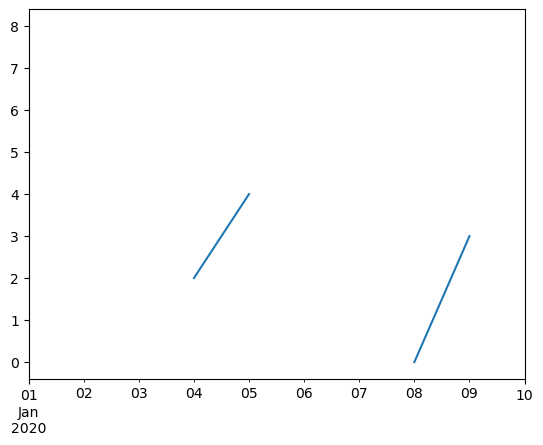

In [250]:
ts.plot()

In [251]:
ts.interpolate()

2020-01-01    8.000000
2020-01-02    6.000000
2020-01-03    4.000000
2020-01-04    2.000000
2020-01-05    4.000000
2020-01-06    2.666667
2020-01-07    1.333333
2020-01-08    0.000000
2020-01-09    3.000000
2020-01-10    3.000000
Freq: D, dtype: float64

<AxesSubplot:>

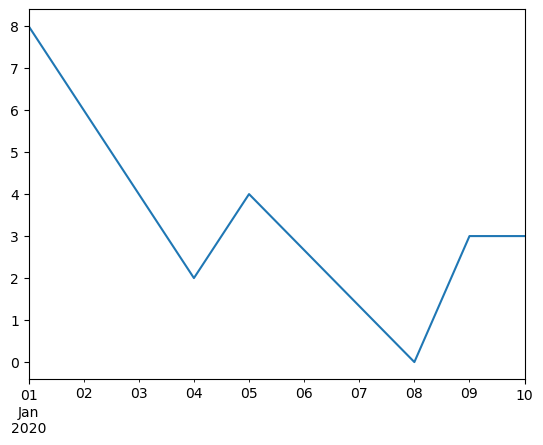

In [252]:
ts.interpolate().plot()

#### Replacing values

In [253]:
df = pd.DataFrame(np.eye(3))
df

,0,1,2
0,1.0,0.0,0.0
1,0.0,1.0,0.0
2,0.0,0.0,1.0


In [257]:
df_missing = df.replace(0, np.nan)
df_missing

,0,1,2
0,1.0,NaN,NaN
1,NaN,1.0,NaN
2,NaN,NaN,1.0


In [258]:
df_filled = df_missing.replace(np.nan,2)
df_filled

,0,1,2
0,1.0,2.0,2.0
1,2.0,1.0,2.0
2,2.0,2.0,1.0


In [259]:
df_filled.replace([1,44], [2,28])

,0,1,2
0,2.0,2.0,2.0
1,2.0,2.0,2.0
2,2.0,2.0,2.0


In [260]:
df_filled.replace({1:44, 2: 28})

,0,1,2
0,44.0,28.0,28.0
1,28.0,44.0,28.0
2,28.0,28.0,44.0


## Merge, join, concatenate and compare
1) "concat()" :- Merge multiple Series or DataFrame objects along a shared index or column

2) "DataFrame.join()" :- Merge multiple DataFrame objects along the columns

3) "DataFrame.combine_first()" :- Update missing values with non-missing values in the same location

4) "merge()" :- Combine two Series or DataFrame objects with SQL-style joining

5) "merge_ordered()" :- Combine two Series or DataFrame objects along an ordered axis

6) "merge_asof()" :- Combine two Series or DataFrame objects by near instead of exact matching keys

7) "Series.compare()" and "DataFrame.compare()" :- Show difference in values between two Series or DataFrame objects

#### concat()
It concatenates an arbitrary amount of Series or DataFrame objects along an axis while performing optional set logic (union or intersection) of the indexes on the other axes. "concat()" takes a list or dict of homogeneously-typed objects and concatenates them

In [261]:
df1 = pd.DataFrame(
    {
        "A": ["A0","A1","A2","A3"],
        "B": ["B0","B1","B2","B3"],
        "C": ["C0","C1","C2","C3"],
        "D": ["D0","D1","D2","D3"]
    },
    index=[0,1,2,3]
)
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [263]:
df2 = pd.DataFrame(
    {
        "A": ["A4","A5","A6","A7"],
        "B": ["B4","B5","B6","B7"],
        "C": ["C4","C5","C6","C7"],
        "D": ["D4","D5","D6","D7"]
    },
    index=[4,5,6,7]
)
df2

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [264]:
df3 = pd.DataFrame(
    {
        "A": ["A8","A9","A10","A11"],
        "B": ["B8","B9","B10","B11"],
        "C": ["C8","C9","C10","C11"],
        "D": ["D8","D9","D10","D11"]
     },
     index=[8,9,10,11]
)
df3

,A,B,C,D
8,A8,B8,C8,D8
9,A9,B9,C9,D9
10,A10,B10,C10,D10
11,A11,B11,C11,D11


In [265]:
frames = [df1,df2,df3]

In [266]:
result = pd.concat(frames)
result

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


"concat()" makes a full copy of the data, and iteratively reusing "concat()" can create unnecessary copies. Collect all DataFrame or Series objects in a list before using "concat()"

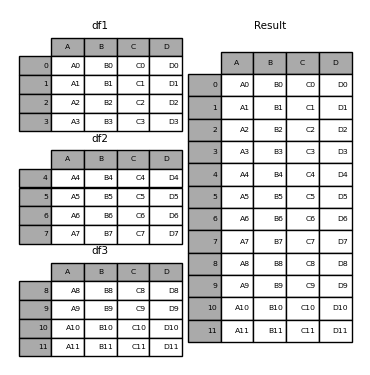

#### Joining logic of the resulting axis
The "join" keyword specifies how to handle axis values that don't exist in the first DataFrame

"join='outer'" takes the union of all axis values

In [267]:
df4 = pd.DataFrame(
    {
        "B": ["B2","B3","B6","B7"],
        "D": ["D2","D3","D6","D7"],
        "F": ["F2","F3","F6","F7"]
    },
    index=[2,3,6,7]
)

In [270]:
df1, df4

(    A   B   C   D
 0  A0  B0  C0  D0
 1  A1  B1  C1  D1
 2  A2  B2  C2  D2
 3  A3  B3  C3  D3,
     B   D   F
 2  B2  D2  F2
 3  B3  D3  F3
 6  B6  D6  F6
 7  B7  D7  F7)

In [268]:
result = pd.concat([df1, df4], axis=1)
result

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3
6,NaN,NaN,NaN,NaN,B6,D6,F6
7,NaN,NaN,NaN,NaN,B7,D7,F7


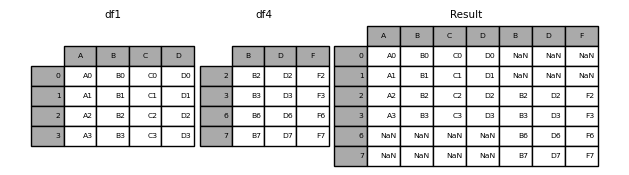

join='inner' takes the intersection of the axis values

In [272]:
result = pd.concat([df1, df4], axis=1, join="inner")
result

,A,B,C,D,B,D,F
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


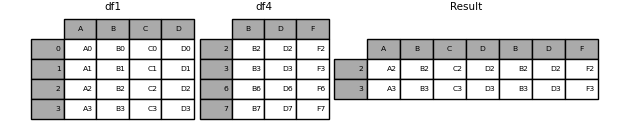

To perform an effective "left" join using the exact index from the original "DataFrame", result can be reindexed.

In [273]:
result = pd.concat([df1, df4], axis=1).reindex(df1.index)
result

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


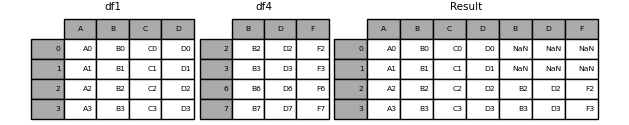

#### Ignoring indexes on the concatenation axis
For DataFrame objects which don't have a meaningful index, the "ignore_index" ignores overlapping indexes.

In [274]:
result = pd.concat([df1, df4], ignore_index=True, sort=False)
result

,A,B,C,D,F
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
4,NaN,B2,NaN,D2,F2
5,NaN,B3,NaN,D3,F3
6,NaN,B6,NaN,D6,F6
7,NaN,B7,NaN,D7,F7


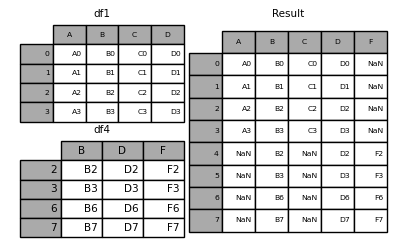

#### Concatenating Series and DataFrame together
You can concatenate a mix of "Series" and "DataFrame" objects. The "Series" will be transformed to "DataFrame" with column name as the name of the "Series".

In [275]:
s1 = pd.Series(["X0","X1","X2","X3"], name="X")
result = pd.concat([df1,s1], axis=1)
result

,A,B,C,D,X
0,A0,B0,C0,D0,X0
1,A1,B1,C1,D1,X1
2,A2,B2,C2,D2,X2
3,A3,B3,C3,D3,X3


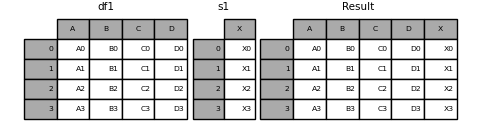

Unnamed "Series" will be numbered consecutively.

In [276]:
s2 = pd.Series(["_0","_1","_2","_3"])
result = pd.concat([df1, s2, s2, s2], axis=1)
result

,A,B,C,D,0,1,2
0,A0,B0,C0,D0,_0,_0,_0
1,A1,B1,C1,D1,_1,_1,_1
2,A2,B2,C2,D2,_2,_2,_2
3,A3,B3,C3,D3,_3,_3,_3


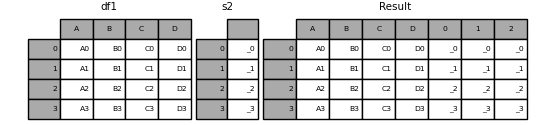

In [277]:
result = pd.concat([df1, s1], axis=1, ignore_index=True)
result

,0,1,2,3,4
0,A0,B0,C0,D0,X0
1,A1,B1,C1,D1,X1
2,A2,B2,C2,D2,X2
3,A3,B3,C3,D3,X3


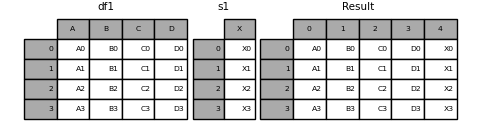

#### Resulting "keys"
The "keys" argument adds another axis level to the resulting index or column (creating a "MultiIndex") associate specific keys with each original "DataFrame".

In [279]:
frames

[    A   B   C   D
 0  A0  B0  C0  D0
 1  A1  B1  C1  D1
 2  A2  B2  C2  D2
 3  A3  B3  C3  D3,
     A   B   C   D
 4  A4  B4  C4  D4
 5  A5  B5  C5  D5
 6  A6  B6  C6  D6
 7  A7  B7  C7  D7,
       A    B    C    D
 8    A8   B8   C8   D8
 9    A9   B9   C9   D9
 10  A10  B10  C10  D10
 11  A11  B11  C11  D11]

In [278]:
result = pd.concat(frames, keys=["x","y","z"])
result

A    B    C    D
x 0    A0   B0   C0   D0
  1    A1   B1   C1   D1
  2    A2   B2   C2   D2
  3    A3   B3   C3   D3
y 4    A4   B4   C4   D4
  5    A5   B5   C5   D5
  6    A6   B6   C6   D6
  7    A7   B7   C7   D7
z 8    A8   B8   C8   D8
  9    A9   B9   C9   D9
  10  A10  B10  C10  D10
  11  A11  B11  C11  D11

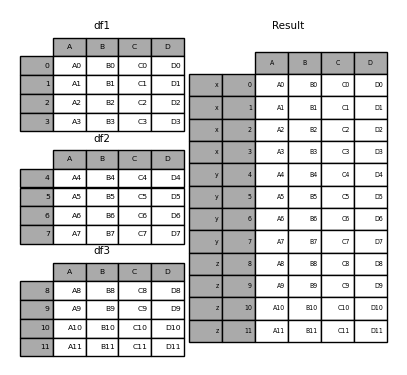

The "keys" argument can override the column names when creating a new "DataFrame" based on existing "Series"

In [280]:
s3 = pd.Series([0,1,2,3], name="foo")
s3

0    0
1    1
2    2
3    3
Name: foo, dtype: int64

In [281]:
s4 = pd.Series([0,1,2,3])
s5 = pd.Series([0,1,4,5])

In [282]:
pd.concat([s3, s4, s5], axis=1)

,foo,0,1
0,0,0,0
1,1,1,1
2,2,2,4
3,3,3,5


You can also pass a dict to "concat()" in which case the dict keys will be used for the "keys" argument unless other "keys" argument is specified:

In [283]:
pieces = {"x":df1, "y": df2, "z": df3}
pieces

{'x':     A   B   C   D
 0  A0  B0  C0  D0
 1  A1  B1  C1  D1
 2  A2  B2  C2  D2
 3  A3  B3  C3  D3,
 'y':     A   B   C   D
 4  A4  B4  C4  D4
 5  A5  B5  C5  D5
 6  A6  B6  C6  D6
 7  A7  B7  C7  D7,
 'z':       A    B    C    D
 8    A8   B8   C8   D8
 9    A9   B9   C9   D9
 10  A10  B10  C10  D10
 11  A11  B11  C11  D11}

In [284]:
result = pd.concat(pieces)
result

A    B    C    D
x 0    A0   B0   C0   D0
  1    A1   B1   C1   D1
  2    A2   B2   C2   D2
  3    A3   B3   C3   D3
y 4    A4   B4   C4   D4
  5    A5   B5   C5   D5
  6    A6   B6   C6   D6
  7    A7   B7   C7   D7
z 8    A8   B8   C8   D8
  9    A9   B9   C9   D9
  10  A10  B10  C10  D10
  11  A11  B11  C11  D11

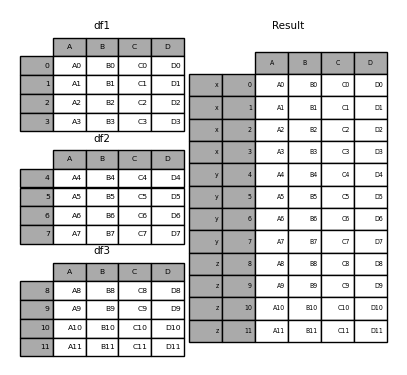